In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv


In [10]:
homeless = pd.read_excel (r"Data/England_HomelessData_until2020.xlsx", sheet_name='A6',  skiprows=5, skipfooter = 17, usecols= "A,B,E")
homeless.columns = ["Current\nONS code", "Authority", "Households"]
display(homeless)

,Current\nONS code,Authority,Households
0,-,Rest of England,54490
1,NaN,NaN,NaN
2,E12000001,North East,3700
3,E12000002,North West,9920
4,E12000003,Yorkshire and The Humber,6640
...,...,...,...
312,E07000217,Woking,73
313,E06000041,Wokingham,78
314,E08000031,Wolverhampton,585
315,E07000237,Worcester,187


In [14]:
waiting = pd.read_excel (r"./Data/Unprocessed Original Data sets/waiting.xls", skiprows=3, skipfooter = 25, usecols= "B,AL", names=["Current\nONS code", "2021"])
waiting.dropna(how='all', axis=0, inplace=True)
display(waiting)
# waiting.head()


,Current\nONS code,2021
1,E07000223,741
2,E07000026,2585
3,E07000157,..
4,E07000032,2035
5,E07000224,1054
...,...,...
385,E12000005,103262
388,E12000006,99582
391,E12000007,295953
394,E12000008,113248


In [15]:
df = pd.merge(homeless, waiting, how="left", left_on="Current\nONS code", right_on="Current\nONS code")
df.dropna(how='any', axis=0, inplace=True)
df.head(10)
display(df)

,Current\nONS code,Authority,Households,2021
2,E12000001,North East,3700,53087
3,E12000002,North West,9920,171800
4,E12000003,Yorkshire and The Humber,6640,156534
5,E12000004,East Midlands,5410,81591
6,E12000005,West Midlands,6550,103262
...,...,...,...,...
312,E07000217,Woking,73,957
313,E06000041,Wokingham,78,2086
314,E08000031,Wolverhampton,585,9256
315,E07000237,Worcester,187,1234


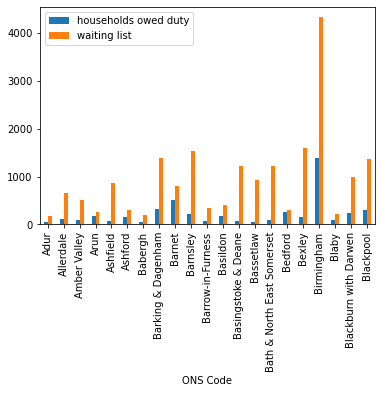

In [22]:
cols = 30
df2 = pd.DataFrame({"households owed duty": df.iloc[9:cols,2], "waiting list":df.iloc[9:cols,3]/4, "ONS Code": df.iloc[9:cols,1]})
df2.plot.bar(x = "ONS Code",rot = 0 );
plt.xticks(rotation=90)
plt.show()
# plt.savefig('Figure/homeless_waiting.png')